In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv("LeosData.csv", sep=",")
data.head()

,Patient,Age,Sex,WFNS_Group,WFNS,Aneursym_location,DCI,eGOS,SD_Day,Total_SD,Single_SD,Clusters_SD,Mean_LPRX
0,HD-1,55,F,high-grade,4,Acom,Yes,0,4.6,46,24,22,0.18
1,HD-2,38,M,high-grade,4,Acom,Yes,3,1.1,6,6,0,0.10
2,HD-3,28,F,high-grade,5,ICA-R,Yes,3,0.4,4,4,0,-0.04
3,HD-4,47,M,high-grade,5,Acom,No,4,0.8,3,3,0,0.26
4,HD-5,68,F,Low-grade,2,MCA-R,No,6,0.0,9,9,0,0.15


In [3]:
# Data Transformation

# Sex 
data["Sex"] = data["Sex"].replace("F",0)
data["Sex"] = data["Sex"].replace("M",1)

# WFNS_Group
data["WFNS_Group"] = data["WFNS_Group"].replace("high-grade",0)
data["WFNS_Group"] = data["WFNS_Group"].replace("Low-grade",1)


# Normalize columns
# data["Age"] = (data["Age"] - data["Age"].min()) / (data["Age"].max() - data["Age"].min())
# data["Total_SD"] = (data["Total_SD"] - data["Total_SD"].min()) / (data["Total_SD"].max() - data["Total_SD"].min())
# data["Single_SD"] = (data["Single_SD"] - data["Single_SD"].min()) / (data["Single_SD"].max() - data["Single_SD"].min())
# data["Clusters_SD"] = (data["Clusters_SD"] - data["Clusters_SD"].min()) / (data["Clusters_SD"].max() - data["Clusters_SD"].min())

data

,Patient,Age,Sex,WFNS_Group,WFNS,Aneursym_location,DCI,eGOS,SD_Day,Total_SD,Single_SD,Clusters_SD,Mean_LPRX
0,HD-1,55,0,0,4,Acom,Yes,0,4.6,46,24,22,0.18
1,HD-2,38,1,0,4,Acom,Yes,3,1.1,6,6,0,0.10
2,HD-3,28,0,0,5,ICA-R,Yes,3,0.4,4,4,0,-0.04
3,HD-4,47,1,0,5,Acom,No,4,0.8,3,3,0,0.26
4,HD-5,68,0,1,2,MCA-R,No,6,0.0,9,9,0,0.15
5,HD-6,52,0,0,5,ICA-R,Yes,0,0.6,4,4,0,0.05
6,HD-7,78,1,0,5,ICA-R (Pcom),Yes,3,0.6,5,5,0,0.14
7,HD-8,46,1,0,4,MCA-L,No,3,0.4,4,4,0,-0.20
8,HD-9,54,0,0,4,MCA-L,No,2,0.7,5,5,0,0.34
9,HD-10,52,1,0,5,Acom,Yes,0,1.0,4,4,0,0.00


In [4]:


data["Age"].describe()


count    19.000000
mean     50.421053
std      10.792568
min      28.000000
25%      46.000000
50%      48.000000
75%      53.500000
max      78.000000
Name: Age, dtype: float64

In [5]:
data["Mean_LPRX"].describe()

count    19.000000
mean      0.108421
std       0.126854
min      -0.200000
25%       0.055000
50%       0.130000
75%       0.170000
max       0.340000
Name: Mean_LPRX, dtype: float64

<Axes: xlabel='Mean_LPRX', ylabel='Count'>

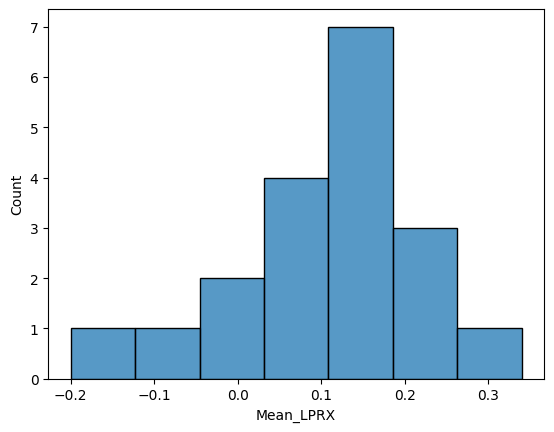

In [6]:
#histogram of the dependent variable
sbn.histplot(data['Mean_LPRX'])

Pearson Corr Age vs Mean LPRX:  0.3584184151607953
Spearman Corr Age vs Mean LPRX:  0.5180475810991894
Kendall Corr Age vs Mean LPRX:  0.3224239743743273


<Axes: xlabel='Age', ylabel='Mean_LPRX'>

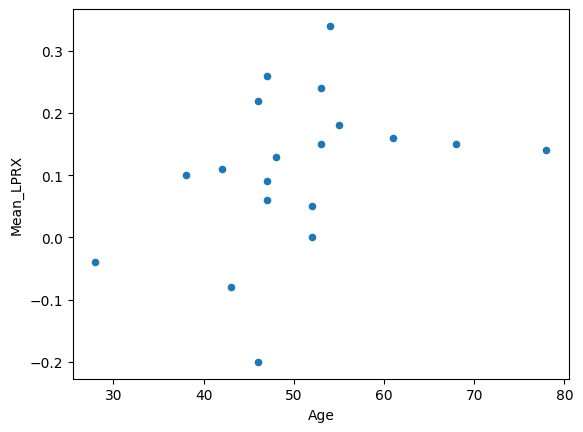

In [7]:
# Relationship with numerical variables (Age vs Mean LPRX)

# Correlation
print("Pearson Corr Age vs Mean LPRX: ", data['Age'].corr(data['Mean_LPRX'], method="pearson"))
print("Spearman Corr Age vs Mean LPRX: ", data['Age'].corr(data['Mean_LPRX'], method="spearman"))
print("Kendall Corr Age vs Mean LPRX: ", data['Age'].corr(data['Mean_LPRX'], method="kendall"))

# Scatter plot
sub_data = data.loc[:,["Age","Mean_LPRX"]]
sub_data.plot.scatter(x="Age", y='Mean_LPRX')


Pearson Corr Total_SD vs Mean LPRX:  0.07476102547558117
Spearman Corr Total_SD vs Mean LPRX:  0.05337513208821272
Kendall Corr Total_SD vs Mean LPRX:  0.072088001074752


<Axes: xlabel='Total_SD', ylabel='Mean_LPRX'>

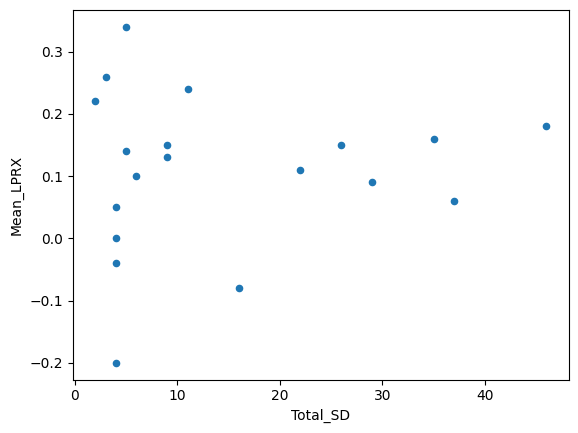

In [8]:
# Relationship with numerical variables (Total_SD vs Mean LPRX)

# Correlation
print("Pearson Corr Total_SD vs Mean LPRX: ", data['Total_SD'].corr(data['Mean_LPRX'], method="pearson"))
print("Spearman Corr Total_SD vs Mean LPRX: ", data['Total_SD'].corr(data['Mean_LPRX'], method="spearman"))
print("Kendall Corr Total_SD vs Mean LPRX: ", data['Total_SD'].corr(data['Mean_LPRX'], method="kendall"))

# Scatter plot
sub_data = data.loc[:,["Total_SD","Mean_LPRX"]]
sub_data.plot.scatter(x="Total_SD", y='Mean_LPRX')


Pearson Corr Single_SD vs Mean LPRX:  0.04626886623705506
Spearman Corr Single_SD vs Mean LPRX:  0.03574630883186673
Kendall Corr Single_SD vs Mean LPRX:  0.06628430655570049


<Axes: xlabel='Single_SD', ylabel='Mean_LPRX'>

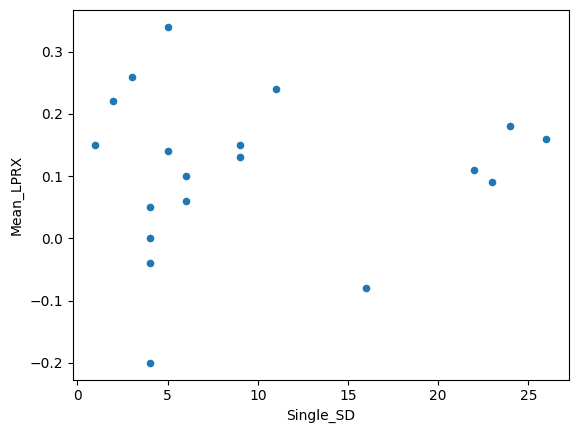

In [9]:
# Relationship with numerical variables (Single_SD vs Mean LPRX)

# Correlation
print("Pearson Corr Single_SD vs Mean LPRX: ", data['Single_SD'].corr(data['Mean_LPRX'], method="pearson"))
print("Spearman Corr Single_SD vs Mean LPRX: ", data['Single_SD'].corr(data['Mean_LPRX'], method="spearman"))
print("Kendall Corr Single_SD vs Mean LPRX: ", data['Single_SD'].corr(data['Mean_LPRX'], method="kendall"))

# Scatter plot
sub_data = data.loc[:,["Single_SD","Mean_LPRX"]]
sub_data.plot.scatter(x="Single_SD", y='Mean_LPRX')


Pearson Corr Clusters_SD vs Mean LPRX:  0.06549333121788085
Spearman Corr Clusters_SD vs Mean LPRX:  0.08887149970860407
Kendall Corr Clusters_SD vs Mean LPRX:  0.06002450479987809


<Axes: xlabel='Clusters_SD', ylabel='Mean_LPRX'>

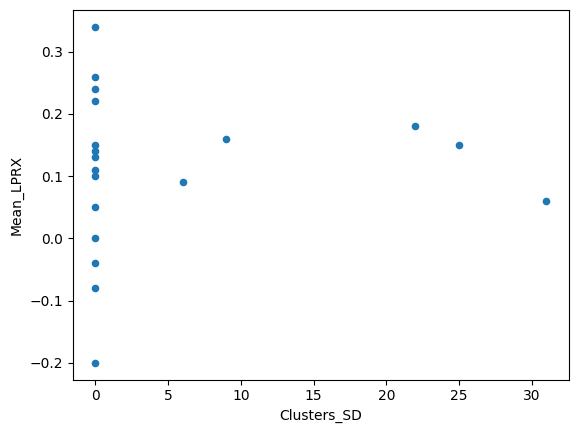

In [10]:
# Relationship with numerical variables (Single_SD vs Mean LPRX)

# Correlation
print("Pearson Corr Clusters_SD vs Mean LPRX: ", data['Clusters_SD'].corr(data['Mean_LPRX'], method="pearson"))
print("Spearman Corr Clusters_SD vs Mean LPRX: ", data['Clusters_SD'].corr(data['Mean_LPRX'], method="spearman"))
print("Kendall Corr Clusters_SD vs Mean LPRX: ", data['Clusters_SD'].corr(data['Mean_LPRX'], method="kendall"))

# Scatter plot
sub_data = data.loc[:,["Clusters_SD","Mean_LPRX"]]
sub_data.plot.scatter(x="Clusters_SD", y='Mean_LPRX')




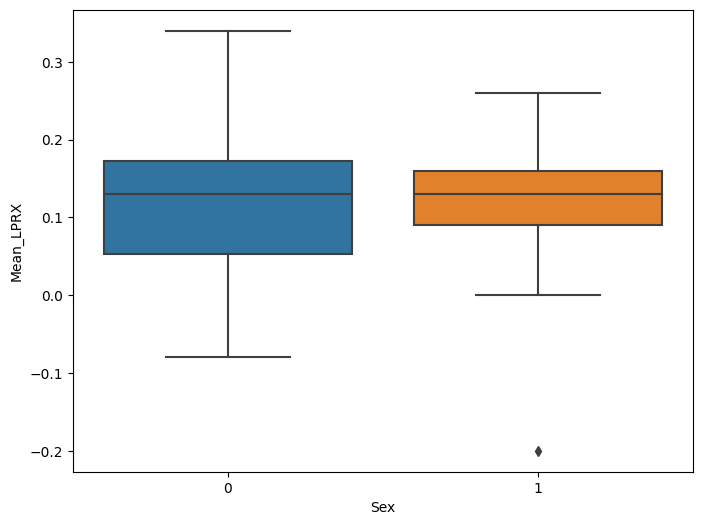

In [11]:
#box plot Sex	Sex/Mean_LPRX
sub_data = data.loc[:,["Sex","Mean_LPRX"]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sbn.boxplot(x="Sex", y="Mean_LPRX", data=sub_data)

0.016436114501180803


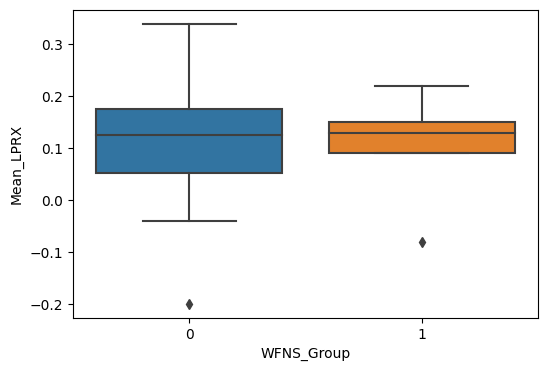

In [12]:
#box plot WFNS_Group/Mean_LPRX

# H0 = There is no correlation between the variables
# > F => correlation.  close to 0 => No correlation**
# Conduct the one-way ANOVA
F, p = stats.f_oneway(data[data.WFNS_Group==0].Mean_LPRX,
                      data[data.WFNS_Group==1].Mean_LPRX,
                      )

print(F)

sub_data = data.loc[:,["WFNS_Group","Mean_LPRX"]]
f, ax = plt.subplots(figsize=(6, 4))
fig = sbn.boxplot(x="WFNS_Group", y="Mean_LPRX", data=sub_data)

In [13]:
data["Aneursym_location"].unique()

array(['Acom', 'ICA-R', 'MCA-R', 'ICA-R (Pcom)', 'MCA-L', 'ICA-L (Pcom)',
       nan], dtype=object)

1.2202261166079709


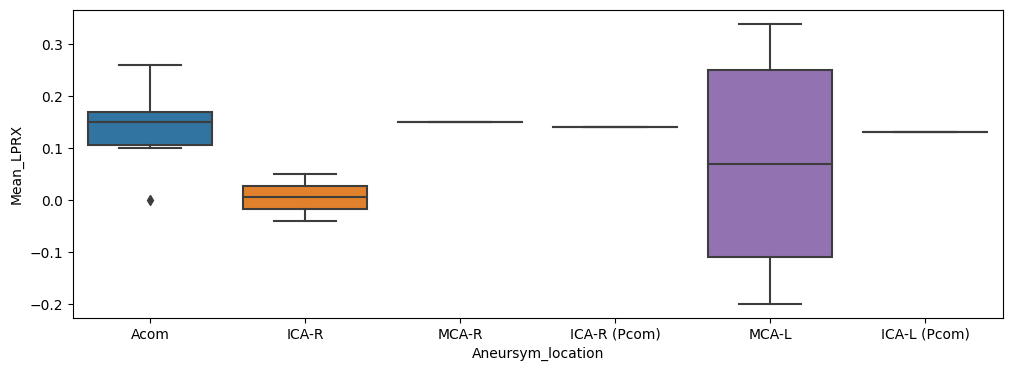

In [14]:
#box plot Aneursym_location/Mean_LPRX

# H0 = There is no correlation between the variables
# > F => correlation.  close to 0 => No correlation **
# Conduct the one-way ANOVA
F, p = stats.f_oneway(data[data.Aneursym_location=='Acom'].Mean_LPRX,
                      data[data.Aneursym_location=='ICA-R'].Mean_LPRX,
                      data[data.Aneursym_location=='ICA-R (Pcom)'].Mean_LPRX,
                      data[data.Aneursym_location=='ICA-L (Pcom)'].Mean_LPRX,
                      data[data.Aneursym_location=='MCA-R'].Mean_LPRX)

print(F)

sub_data = data.loc[:,["Aneursym_location","Mean_LPRX"]]
f, ax = plt.subplots(figsize=(12, 4))
fig = sbn.boxplot(x="Aneursym_location", y="Mean_LPRX", data=sub_data)

0.34264803286534473


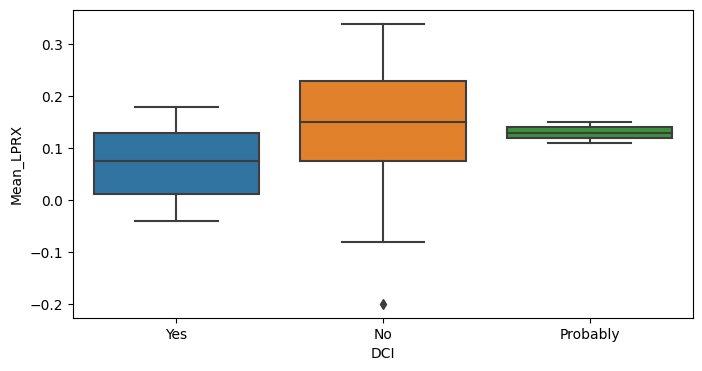

In [15]:
#box plot DCI/Mean_LPRX

# H0 = There is no correlation between the variables
# > F => correlation.  close to 0 => No correlation **
# Conduct the one-way ANOVA
F, p = stats.f_oneway(data[data.DCI=='Yes'].Mean_LPRX,
                      data[data.DCI=='No'].Mean_LPRX,
                      data[data.DCI=='Probably'].Mean_LPRX)

print(F)

sub_data = data.loc[:,["DCI","Mean_LPRX"]]
f, ax = plt.subplots(figsize=(8, 4))
fig = sbn.boxplot(x="DCI", y="Mean_LPRX", data=sub_data)


0.9184590637582863


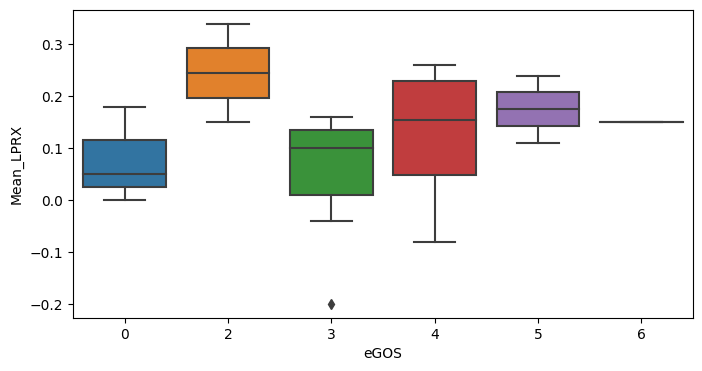

In [16]:


#box plot eGOS/Mean_LPRX

# H0 = There is no correlation between the variables
# > F => correlation.  close to 0 => No correlation **
# Conduct the one-way ANOVA
F, p = stats.f_oneway(data[data.eGOS==0].Mean_LPRX,
                      data[data.eGOS==3].Mean_LPRX,
                      data[data.eGOS==4].Mean_LPRX,
                      data[data.eGOS==6].Mean_LPRX,
                      data[data.eGOS==2].Mean_LPRX,
                      data[data.eGOS==5].Mean_LPRX,
                      )

print(F)

sub_data = data.loc[:,["eGOS","Mean_LPRX"]]
f, ax = plt.subplots(figsize=(8, 4))
fig = sbn.boxplot(x="eGOS", y="Mean_LPRX", data=sub_data)


In [17]:
data["eGOS"].unique()

array([0, 3, 4, 6, 2, 5])

/tmp/ipykernel_5031/3836495330.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = sub_data_corr.corr()


<Axes: >

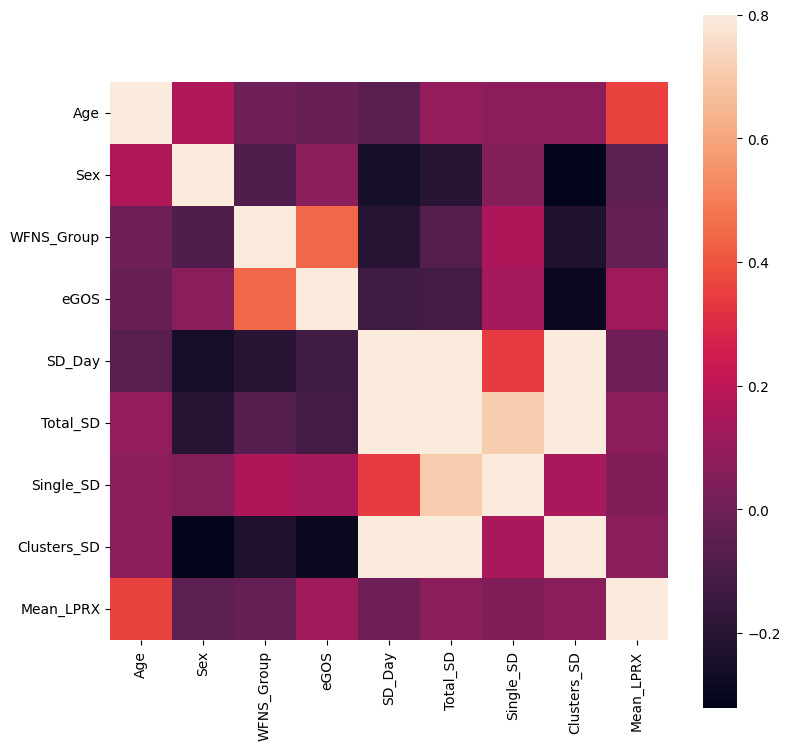

In [18]:
#correlation matrix
sub_data_corr = data.loc[:,['Age', 'Sex', 'WFNS_Group','Aneursym_location',
       'DCI', 'eGOS', 'SD_Day', 'Total_SD', 'Single_SD', 'Clusters_SD',
       'Mean_LPRX']]
corrmat = sub_data_corr.corr()
f, ax = plt.subplots(figsize=(9, 9))
sbn.heatmap(corrmat, vmax=.8, square=True)

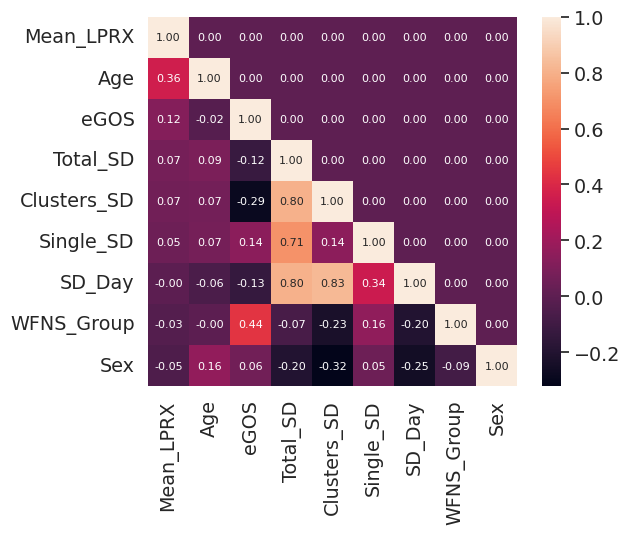

In [63]:
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Mean_LPRX')['Mean_LPRX'].index
cm = np.corrcoef(sub_data_corr[cols].values.T, rowvar=True)
cm = np.tril(cm, k=0)
sbn.set(font_scale=1.25)
hm = sbn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [48]:
def printCorrelation(col1, col2):
    from pandas.api.types import is_numeric_dtype
    if is_numeric_dtype(data[col1]) and is_numeric_dtype(data[col2]):
        print(f"{col1} vs {col2} : {pearsonr(data[col1], data[col2])}")


printCorrelation("Mean_LPRX","Age")


Mean_LPRX vs Age : PearsonRResult(statistic=0.3584184151607953, pvalue=0.1318539766370358)


In [65]:
for i in data.columns:
    for j in data.columns:
        if i == j: continue
        printCorrelation(j,i)

Sex vs Age : PearsonRResult(statistic=0.1626640570392434, pvalue=0.5058241541624846)
WFNS_Group vs Age : PearsonRResult(statistic=-0.0011976863882411544, pvalue=0.9961173963090673)
WFNS vs Age : PearsonRResult(statistic=-0.041920077876581315, pvalue=0.8646999430811262)
eGOS vs Age : PearsonRResult(statistic=-0.021619815153460648, pvalue=0.929995467717968)
SD_Day vs Age : PearsonRResult(statistic=-0.059237646126722596, pvalue=0.809638677240212)
Total_SD vs Age : PearsonRResult(statistic=0.09412506865555664, pvalue=0.7015115492207759)
Single_SD vs Age : PearsonRResult(statistic=0.07279618952178299, pvalue=0.7671062097624051)
Clusters_SD vs Age : PearsonRResult(statistic=0.07023994293680139, pvalue=0.7750802744583686)
Mean_LPRX vs Age : PearsonRResult(statistic=0.3584184151607953, pvalue=0.1318539766370358)
Age vs Sex : PearsonRResult(statistic=0.1626640570392434, pvalue=0.5058241541624846)
WFNS_Group vs Sex : PearsonRResult(statistic=-0.08819171036881972, pvalue=0.7195788587600647)
WFNS 

In [20]:
data

,Patient,Age,Sex,WFNS_Group,WFNS,Aneursym_location,DCI,eGOS,SD_Day,Total_SD,Single_SD,Clusters_SD,Mean_LPRX
0,HD-1,55,0,0,4,Acom,Yes,0,4.6,46,24,22,0.18
1,HD-2,38,1,0,4,Acom,Yes,3,1.1,6,6,0,0.10
2,HD-3,28,0,0,5,ICA-R,Yes,3,0.4,4,4,0,-0.04
3,HD-4,47,1,0,5,Acom,No,4,0.8,3,3,0,0.26
4,HD-5,68,0,1,2,MCA-R,No,6,0.0,9,9,0,0.15
5,HD-6,52,0,0,5,ICA-R,Yes,0,0.6,4,4,0,0.05
6,HD-7,78,1,0,5,ICA-R (Pcom),Yes,3,0.6,5,5,0,0.14
7,HD-8,46,1,0,4,MCA-L,No,3,0.4,4,4,0,-0.20
8,HD-9,54,0,0,4,MCA-L,No,2,0.7,5,5,0,0.34
9,HD-10,52,1,0,5,Acom,Yes,0,1.0,4,4,0,0.00
